In [1]:
## Test LSTM Models on Data

In [2]:
import pandas as pd

import glob

from pathlib import Path
import csv

In [3]:
## Load pickle for exports and imports of data  
import pickle 
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def save_obj(obj, path ):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [4]:
path = Path('../Resources/finished_data_dict.pkl')
data_dict_import = load_obj(path)

In [5]:
path = Path('../Resources/finished_key_list.csv')
key_list_import_df = pd.read_csv(path,index_col=0)
len(key_list_import_df)

9992

In [6]:
key_list = []
for i in key_list_import_df['Symbol']:
    key_list.append(i)
len(key_list)

9992

In [41]:
## Locate Specific Symbol
symbol = 'TSLA'
index_value = 0
for i in range(len(key_list)):
    if key_list[i] == symbol:
        index_value = i
        print(index_value)
        break
    elif i == (len(key_list)-1):
        print("Not in list")

8971


In [42]:
dict_key = key_list[index_value]
dict_key

'TSLA'

In [43]:
df = data_dict_import[dict_key]['dataFrame'].copy()

In [44]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
df

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime,QUANTITY_FAILS,ShortVolumeNSDQ,ShortExemptVolumeNSDQ,TotalVolumeNSDQ,ShortVolumeNYSE,ShortExemptVolumeNYSE,TotalVolumeNYSE
Date,,,,,,,,,,,,,,,,,,
2016-01-04,46.144001,46.276001,43.799999,44.681999,44.681999,34135500.0,34135500.0,-1.4620,-3.168,44.91933,-0.03168,16063.0,1593633.0,5840.0,2243788.0,219381.0,0.0,407391.0
2016-01-05,45.271999,45.377998,44.000000,44.686001,44.686001,15934000.0,15934000.0,-0.5860,-1.294,44.68800,-0.01294,449.0,655145.0,6215.0,969785.0,69899.0,0.0,126181.0
2016-01-06,44.000000,44.009998,43.195999,43.807999,43.807999,18895500.0,18895500.0,-0.1920,-0.436,43.67133,-0.00436,44432.0,805524.0,8070.0,1270196.0,101947.0,0.0,166668.0
2016-01-07,42.838001,43.688000,42.734001,43.130001,43.130001,17771500.0,17771500.0,0.2920,0.682,43.18400,0.00682,31615.0,713187.0,3612.0,1083314.0,103984.0,0.0,161402.0
2016-01-08,43.571999,44.088001,42.153999,42.200001,42.200001,18140500.0,18140500.0,-1.3720,-3.149,42.81400,-0.03149,35040.0,715132.0,27101.0,1068761.0,97573.0,1100.0,154443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,950.530000,1045.020000,944.200000,1024.860000,1024.860000,62959227.0,62959227.0,74.3300,7.820,1004.69333,0.07820,31490.0,8955184.0,108904.0,21294628.0,3596475.0,8080.0,7613555.0
2021-10-26,1024.689900,1094.939900,1001.460000,1018.430000,1018.430000,61885470.0,61885470.0,-6.2599,-0.611,1038.27663,-0.00611,28694.0,9567432.0,134243.0,22617840.0,3945890.0,11013.0,7711403.0
2021-10-27,1039.660000,1070.880000,1030.780000,1037.860000,1037.860000,38247808.0,38247808.0,-1.8000,-0.173,1046.50667,-0.00173,27711.0,5663630.0,41931.0,12956942.0,2856164.0,3421.0,5207665.0


In [39]:
# Create the features set (X) and the target set (y)
X = df.drop(columns='close').values
y = df['close'].values

In [40]:
y

array([ 28.309999,  28.77    ,  28.370001, ..., 173.51    , 182.85    ,
       183.51    ])

In [14]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [15]:
# Create a shallow, 1 hidden layer, neural network
nn1 = Sequential()
num_of_inputs = 17
num_of_outputs= 1

# Hidden layer
nn1.add(Dense(units=8, input_dim=num_of_inputs, activation="relu"))

# Output layer
nn1.add(Dense(units=num_of_outputs, activation="linear"))

In [16]:
# Compile the model
nn1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = nn1.fit(X, y, validation_split=0.3, epochs=800,verbose=0)

In [17]:
# Define the model - deep neural network with two layers
nn2 = Sequential()

# First hidden layer
nn2.add(Dense(units=8, input_dim=num_of_inputs, activation="relu"))

# Second hidden layer
nn2.add(Dense(units=8, activation="relu"))

# Output layer
nn2.add(Dense(units=num_of_outputs, activation="linear"))

In [18]:
# Compile the model
nn2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn2.fit(X, y, validation_split=0.3, epochs=800, verbose=0)

In [19]:
## Evaluate the models 

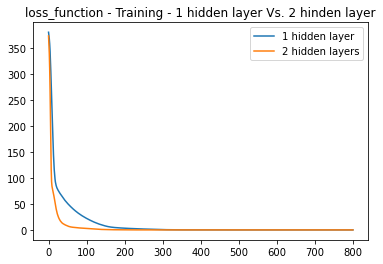

In [20]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

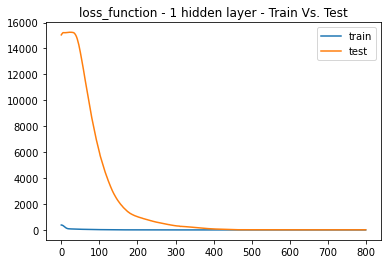

In [21]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

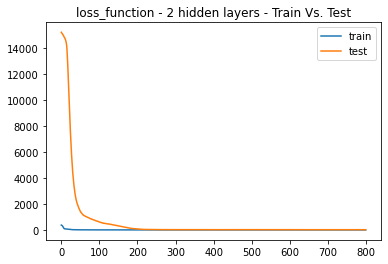

In [22]:
# Plot train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

In [26]:
# Save model_1 as JSON
nn_json1 = nn1.to_json()

file_path = Path("../Resources/model_1.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json1)

# Save weights
file_path = "../Resources/model_1.h5"
nn1.save_weights("../Resources/model_1.h5")

# Save model_2 as JSON
nn_json2 = nn2.to_json()

file_path = Path("../Resources/model_2.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json2)

# Save weights
file_path = "../Resources/model_2.h5"
nn2.save_weights("../Resources/model_2.h5")

In [27]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../Resources/model_1.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model1 = model_from_json(model_json)

# load weights into new model
file_path = "../Resources/model_1.h5"
loaded_model1.load_weights(file_path)

In [28]:
# Load the saved model to make predictions

# load json and create model
file_path = Path("../Resources/model_2.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model2 = model_from_json(model_json)

# load weights into new model
file_path = "../Resources/model_2.h5"
loaded_model2.load_weights(file_path)

In [37]:
# Make some predictions with the loaded model
df1 = df.copy()
df1["predicted"] = loaded_model1.predict(X)
df1_pred = df1[['close','predicted']]
df1_pred

,close,predicted
Date,,
2016-01-04,28.309999,28.272800
2016-01-05,28.770000,28.640223
2016-01-06,28.370001,28.184980
2016-01-07,28.450001,28.390381
2016-01-08,28.370001,28.278553
...,...,...
2021-10-25,173.970000,172.669968
2021-10-26,177.840000,178.696976
2021-10-27,173.510000,173.212448


In [38]:
# Make some predictions with the loaded model
df2 = df.copy()
df2["predicted"] = loaded_model2.predict(X)
df2_pred = df2[['close','predicted']]
df2_pred

,close,predicted
Date,,
2016-01-04,28.309999,28.276089
2016-01-05,28.770000,28.601606
2016-01-06,28.370001,28.167635
2016-01-07,28.450001,28.357849
2016-01-08,28.370001,28.227463
...,...,...
2021-10-25,173.970000,174.778854
2021-10-26,177.840000,181.160538
2021-10-27,173.510000,175.270721
